# Stroke Classification
A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. For that we need to identiy potential stroke chance.

## Importing Libraries

Let's begin with importing necessary libraries for completing our task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import dataframe_image as dfi
%matplotlib inline

## Read CSV
Reading CSV file, which have our data. With help of this CSV we will try to understand the pattern and create our prediction Model.

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)
dfi.export(data.head(10),'head.png')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()
dfi.export(data.describe(),'des.png')

1) id: unique identifier<br/>
2) gender: "Male", "Female" or "Other"<br/>
3) age: age of the patient<br/>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br/>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br/>
6) ever_married: "No" or "Yes"<br/>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br/>
8) Residence_type: "Rural" or "Urban"<br/>
9) avg_glucose_level: average glucose level in blood<br/>
10) bmi: body mass index<br/>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br/>
12) stroke: 1 if the patient had a stroke or 0 if not<br/>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## EDA

### Id

Id is nothing but unique number assign to every patient to keep track on them and making them unique. There is no need of id its completely useless so let's remove it.

In [5]:
data.drop("id",inplace=True,axis=1)

### Gender
This attributes states gender of patient. Let's see how does Gender affects and Gender wise comparision of stroke rate.

In [6]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

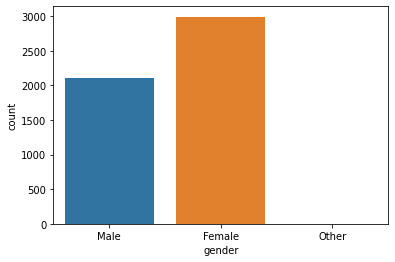

In [7]:
sns.countplot(data=data,x='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

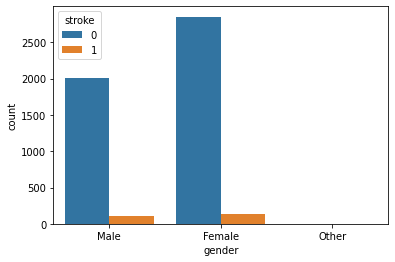

In [8]:
sns.countplot(data=data,x='gender',hue='stroke')

Seems like dataset is imballanced. Anyway, as we can there is not much difference between stroke rate with respect to gender.

### Age

Well here age is just not a number, it's one of the significant or as we can say it's very crucial factor. Let's analyse our data and see how much impact actual impact it has.

In [9]:
data['age'].nunique()

104

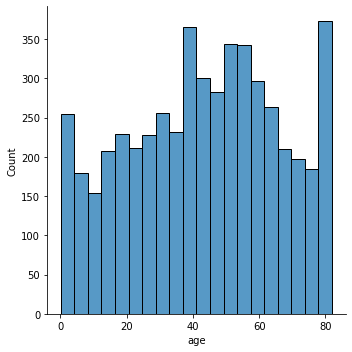

In [10]:
sns.displot(data['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

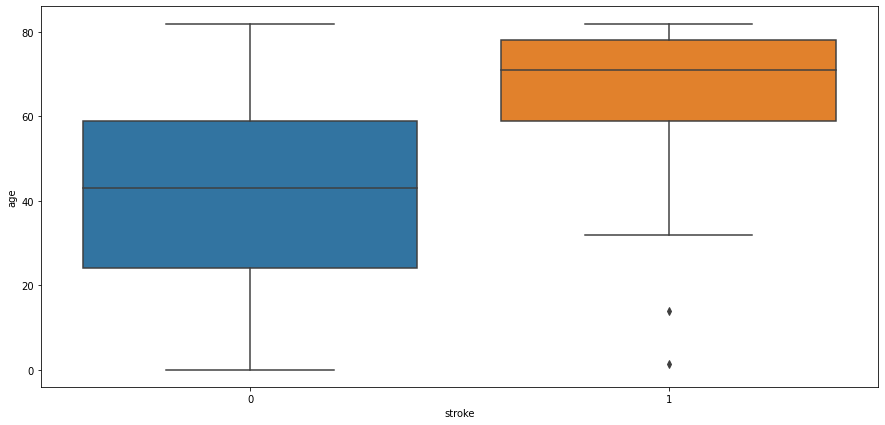

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')

People aged more than 50 years tends to have stroke. There are some outliers which can be seen as people below age 20 are having stroke it might be possible that it's valid data as stroke also depends on our eating and living habbits. Previous argument can be back by another observation and that is people not having strokes also consists of people age > 60 years. 

### Hypertension
Hypertension is a condition when a person has high blood pressure. Hypertension might result into stroke. Let's see how it goes.

In [12]:
print('Value Count',data['hypertension'].unique())
print("Value Counts\n",data['hypertension'].value_counts())

Value Count [0 1]
Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64


<AxesSubplot:xlabel='hypertension', ylabel='count'>

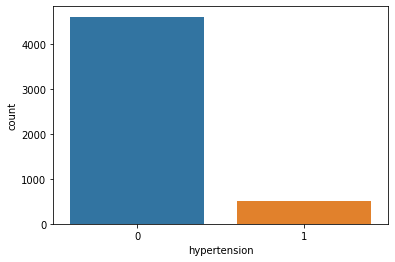

In [13]:
sns.countplot(data=data,x='hypertension')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

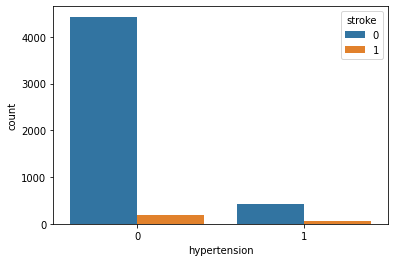

In [14]:
sns.countplot(data=data,x='hypertension',hue='stroke')

Well, hypertension is rare in young people and common in aged people. Hypertension can cause stoke. Based on our data picture is not that clear for hypertension. It has quite few data of patient having hypertension.

### Heart Disease

People having heart disease tends to have higher risk of having stroke if proper care is not taken.

In [15]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

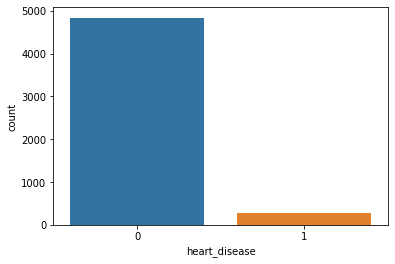

In [16]:
sns.countplot(data=data,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

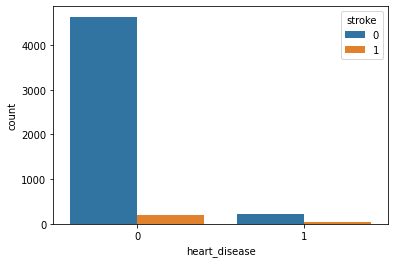

In [17]:
sns.countplot(data=data,x='heart_disease',hue='stroke')

Because of imballanced dataset it's litle bit difficult to get idea. But as per this plot we can say that heart disease is not affecting Stroke.

### Ever Married

In [18]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

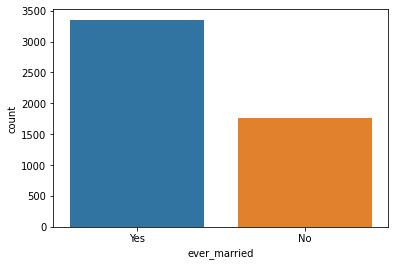

In [19]:
sns.countplot(data=data,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

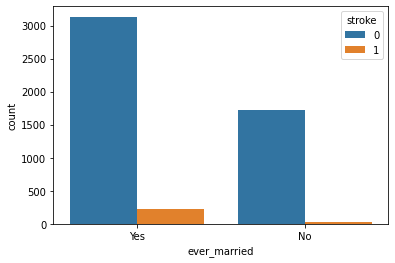

In [20]:
sns.countplot(data=data,x='ever_married',hue='stroke')

People who are married have higher stroke rate.

### Work Type

In [21]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

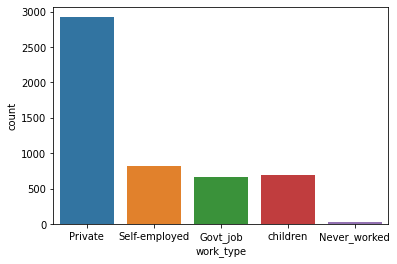

In [22]:
sns.countplot(data=data,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

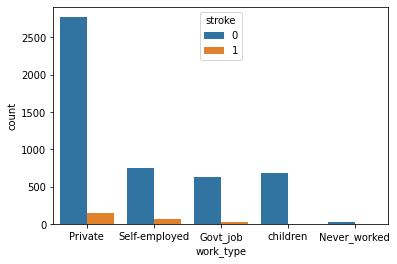

In [23]:
sns.countplot(data=data,x='work_type',hue='stroke')

People working in Private sector have higher risk of getting stroke. And people who have never worked have very less stroke rate.

### Residence Type
This attribute tells us whether what kind of residence patient is. It can be Urban or Rural.

In [24]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

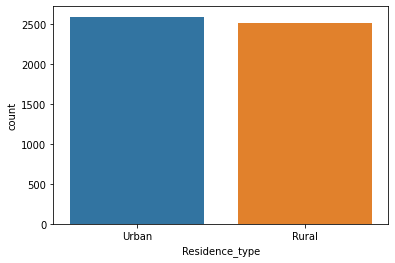

In [25]:
sns.countplot(data=data,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

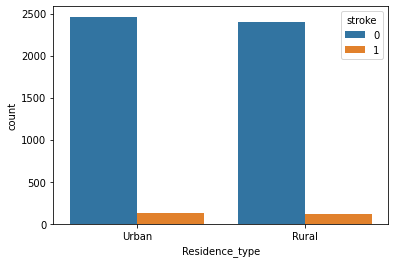

In [26]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

This attribute is of no use. As we can see there not much difference in both attribute values. Maybe we have to discard it.

### Avg Glucose Level
Tells about average glucose level in patient body. Let's see whether this affects chances of having stroke

In [27]:
data['avg_glucose_level'].nunique()

3979

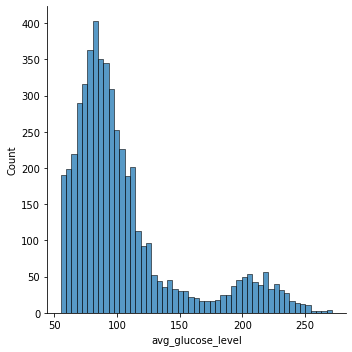

In [28]:
sns.displot(data['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

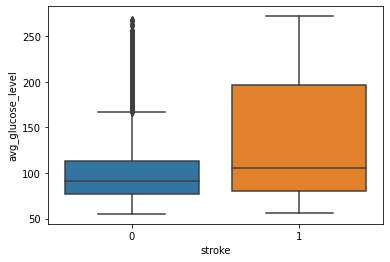

In [29]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')

From this above graph we can see that people having stroke have average glucose level more than 100. There are some obvious outliers in patient who have no stroke but there are some chances of this being genuine records.

### BMI
Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let's see how does it affects chances of having stroke.

In [30]:
data['bmi'].isna().sum()

201

In [31]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [32]:
data['bmi'].nunique()

419

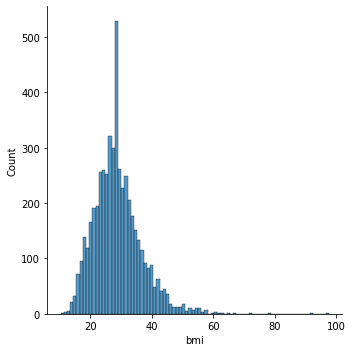

In [33]:
sns.displot(data['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

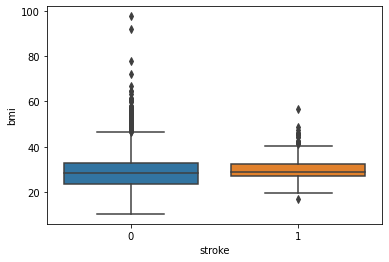

In [34]:
sns.boxplot(data=data,x='stroke',y='bmi')

There are as such no promient observation how does bmi affects chances of having stroke.

### Smoking Status
This attributes tells us whether or not patient smokes. Smoking is injurious to health and it may cause cardiac disease. Let's see how it turns out in case of our data.

In [35]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

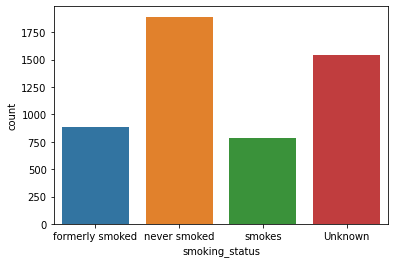

In [36]:
sns.countplot(data=data,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

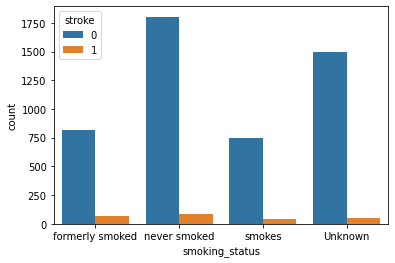

In [37]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

As per these plots, we can see there is not much difference in chances of stroke irrespect of smoking status.

### Stroke

Our target variable. It tells us whether patient have chances of stroke.

In [38]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

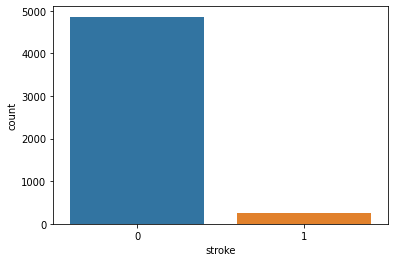

In [39]:
sns.countplot(data=data,x='stroke')

As we can say its imballanced dataset.

## Feature Engineering

In [40]:
cols=data.select_dtypes(include=['object']).columns
cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [41]:
le=LabelEncoder()

In [42]:
data[cols]=data[cols].apply(le.fit_transform)
data.head(10)
dfi.export(data.head(10),'encode.png')

<AxesSubplot:>

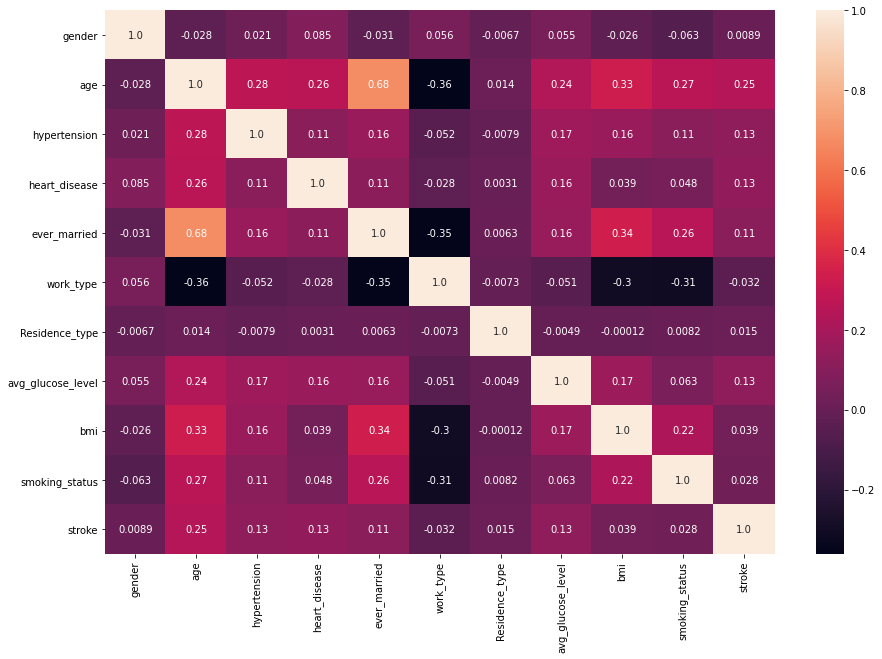

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
dfi.export(fscores.sort_values(by='Score',ascending=False),"feature.png")

In [45]:
cols=fscores[fscores['Score']>50]['Attribute']
cols

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score

In [47]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)

In [48]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3832, 5), (1278, 5), (3832,), (1278,))

## Model Creation

### Balancing Dataset

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [51]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((7296, 5), (7296,), (2426, 5), (2426,))

As we know, our dataset is imbalanced. So let's balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on whole dataset but as we have very less records of minor class I am applying it on both train and test data. Earlier I tried doing it by just resampling data of train dataset but it didn't performed that well so I tried this approach and got a good result.

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
predict=lr.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.8070898598516076
F1 Score -->  0.8151658767772513
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1107
           1       0.85      0.78      0.82      1319

    accuracy                           0.81      2426
   macro avg       0.81      0.81      0.81      2426
weighted avg       0.81      0.81      0.81      2426



### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(n_estimators=20000,max_depth=3,n_jobs=-1,verbose=1)
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 11226 tasks 

Accuracy -->  0.7914262159934048
F1 Score -->  0.8067226890756303
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77      1021
           1       0.87      0.75      0.81      1405

    accuracy                           0.79      2426
   macro avg       0.79      0.80      0.79      2426
weighted avg       0.80      0.79      0.79      2426



[Parallel(n_jobs=12)]: Done 19976 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 20000 out of 20000 | elapsed:    4.7s finished


### SVM

In [56]:
from sklearn.svm import SVC

In [57]:
svc=SVC(C=3)
svc.fit(train_x,train_y)
predict=svc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.7852431986809563
F1 Score -->  0.7928429423459246
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      1124
           1       0.82      0.77      0.79      1302

    accuracy                           0.79      2426
   macro avg       0.79      0.79      0.78      2426
weighted avg       0.79      0.79      0.79      2426



### XGBOOST

In [58]:
from xgboost import XGBClassifier

In [ ]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

c:\users\parth\anaconda3\envs\classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In balance dataset we relay on accuracy but here we have imballanced dataset, I am going with f1 score. For a good classifier it would be great to have a good  precission and recall score. Out of all models XGBClassifier have great result. So as model I am selecting XGBClassifier.